# Classification|

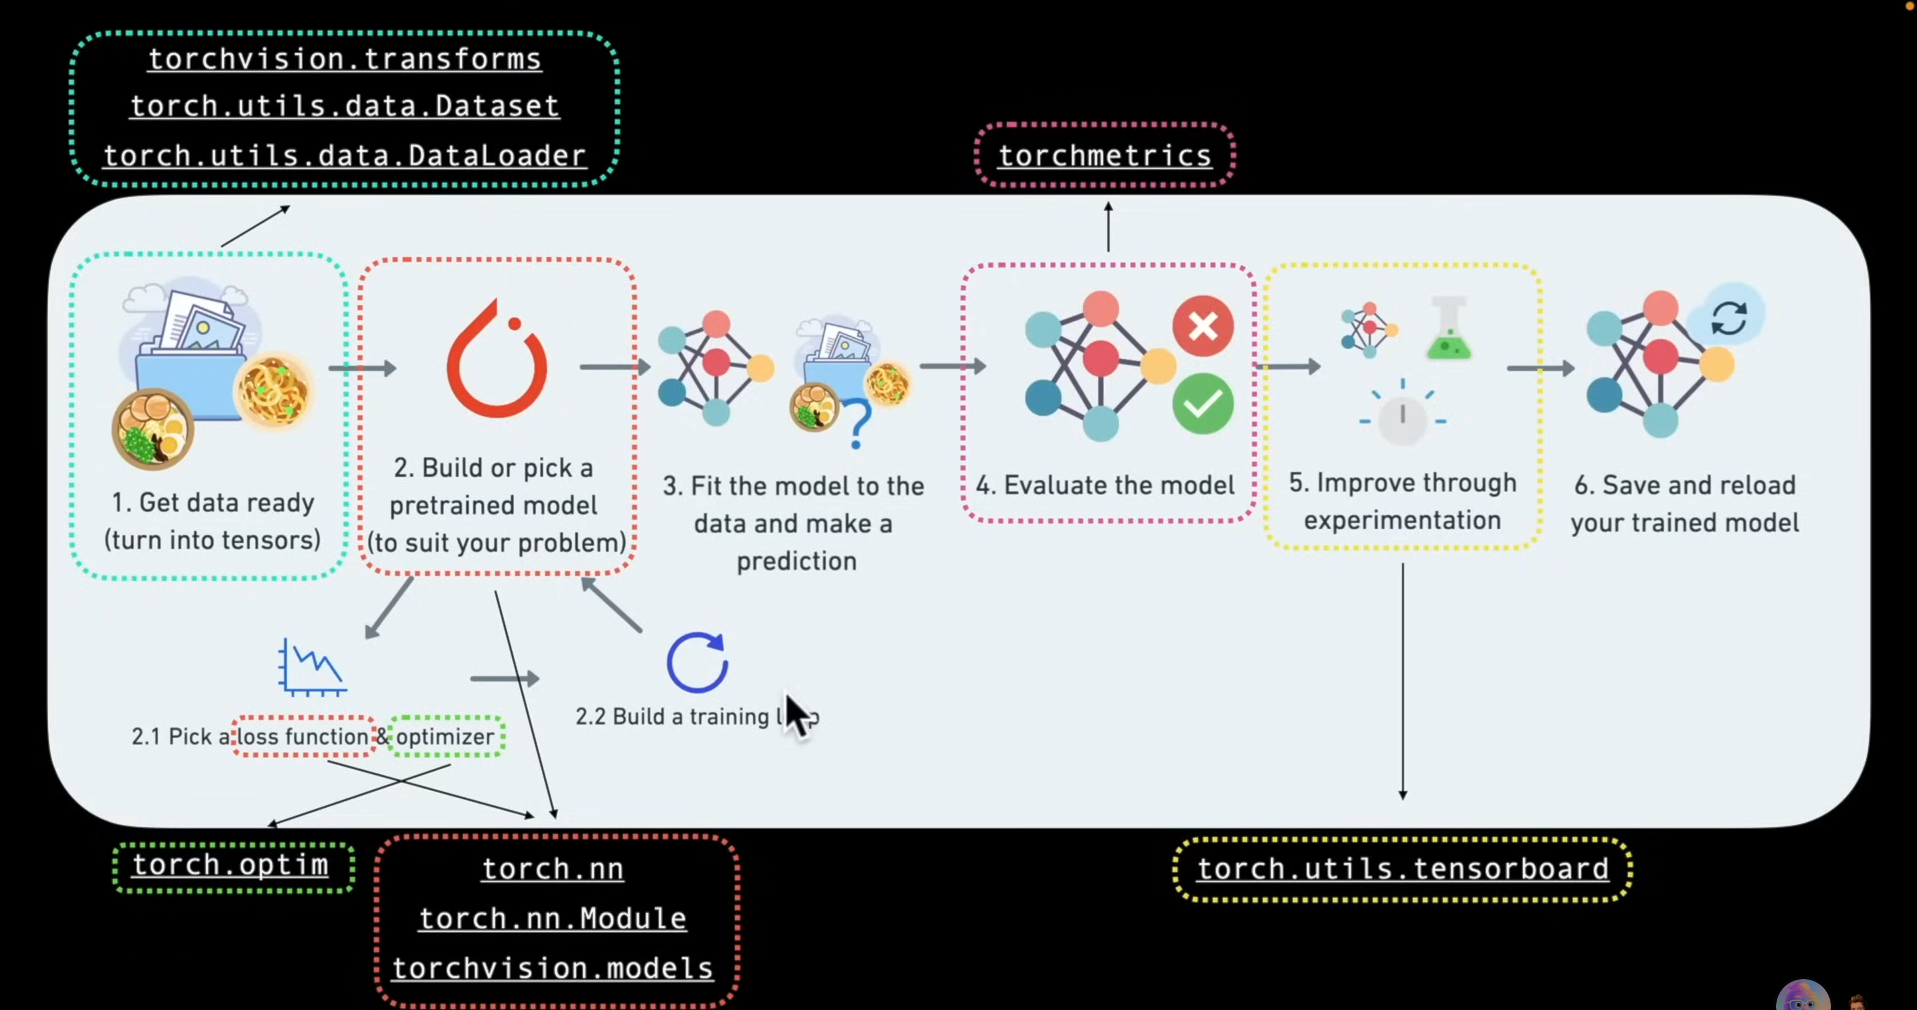

In [100]:
# Creating a test dataset:

from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples , noise = 0.02, random_state = 42)

X[:5],y[:5]


(array([[ 0.76026594,  0.22387823],
        [-0.76722217,  0.1455425 ],
        [-0.80815854,  0.14894355],
        [-0.3760283 ,  0.70320906],
        [ 0.44051035, -0.89761737]]),
 array([1, 1, 1, 1, 0]))

In [2]:
len(X), len(y)

(1000, 1000)

In [3]:
import pandas as pd

circles = pd.DataFrame({"X1" : X[:, 0],
                       "X2" : X[:, 0],
                       "labels" : y})
circles.head(10)

X1        X2  labels
0  0.760266  0.760266       1
1 -0.767222 -0.767222       1
2 -0.808159 -0.808159       1
3 -0.376028 -0.376028       1
4  0.440510  0.440510       0
5 -0.484527 -0.484527       1
6 -0.012450 -0.012450       1
7  0.777458  0.777458       1
8 -0.166138 -0.166138       1
9 -0.126921 -0.126921       0

In [4]:
circles.labels.value_counts()

labels
1    500
0    500
Name: count, dtype: int64

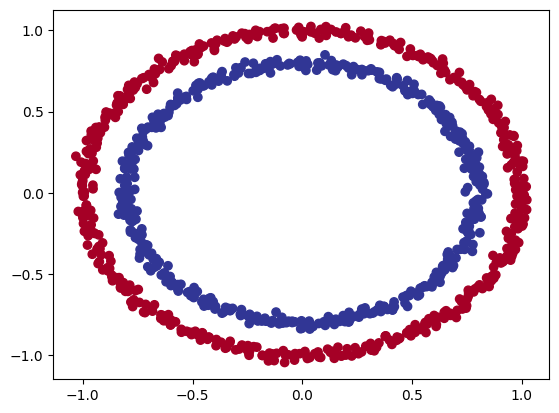

In [5]:
import matplotlib.pyplot as plt

plt.scatter(
    x = X[:, 0],
    y = X[:, 1],
    c=y,
    cmap = plt.cm.RdYlBu

);


In [6]:
# Device Agnostic code

# device = "cuda" if torch.cuda.is_available else "cpu"
device = "cpu"
device

'cpu'

In [7]:
def train_test(epochs, X_train, X_test, y_train, y_test, model, n):

  for epoch in range(epochs):
    model.train()

    y_logits = model(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    Loss = loss_fn(y_logits, y_train)

    acc = accuracy_fn(y_train, y_preds)

    optimizer.zero_grad()

    Loss.backward()

    optimizer.step()

    # Testing
    model_0.eval()
    with torch.inference_mode():

      y_test_logits = model(X_test).squeeze()
      y_test_preds = torch.round(torch.sigmoid(y_test_logits))

      test_loss = loss_fn(y_test_logits, y_test)

      test_acc = accuracy_fn(y_test, y_test_preds)

    if epoch % n == 0:
      print(f"Epoch : {epoch} | Train Loss : {Loss:.4f} | Test Loss : {test_loss:.4f} | Train Accuracy : {acc:.2f} | Test Accuracy : {test_acc:.2f} ")

In [8]:
# Turn the data into tensor
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Segregate the data into train test split:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [9]:
# Creating a model
from torch import nn

class CircleModelv1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, X):
    return self.layer_2(self.layer_1(X))

model_0 = CircleModelv1()
model_0

CircleModelv1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [10]:
# Write a function to calculate the acuracy

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc


In [11]:
# Pick loss function and optimizer here in binary we use (binary cross entropy BCEwithLogitsLoss) 7 for optimizer we use SGD or Adam
from torch import optim, nn
loss_fn = nn.BCEWithLogitsLoss()

optimizer = optim.SGD(model_0.parameters(), lr = 0.1, momentum = 0.9)


:Fit the data into the module using pytorch workflow (Training the model)

`Loop -> model.train() -> forward_pass -> calculate the loss -> optimizer.zero_grad() -> loss.backward() -> optimizer.self`

In [12]:
train_test(100, X_train, X_test, y_train, y_test, model_0, 10)

Epoch : 0 | Train Loss : 0.7098 | Test Loss : 0.7204 | Train Accuracy : 52.25 | Test Accuracy : 51.00 
Epoch : 10 | Train Loss : 0.6970 | Test Loss : 0.7005 | Train Accuracy : 49.12 | Test Accuracy : 46.00 
Epoch : 20 | Train Loss : 0.6932 | Test Loss : 0.7039 | Train Accuracy : 50.75 | Test Accuracy : 41.50 
Epoch : 30 | Train Loss : 0.6925 | Test Loss : 0.7087 | Train Accuracy : 53.87 | Test Accuracy : 42.00 
Epoch : 40 | Train Loss : 0.6921 | Test Loss : 0.7050 | Train Accuracy : 52.50 | Test Accuracy : 42.50 
Epoch : 50 | Train Loss : 0.6920 | Test Loss : 0.7044 | Train Accuracy : 52.62 | Test Accuracy : 41.00 
Epoch : 60 | Train Loss : 0.6920 | Test Loss : 0.7042 | Train Accuracy : 53.87 | Test Accuracy : 41.50 
Epoch : 70 | Train Loss : 0.6920 | Test Loss : 0.7033 | Train Accuracy : 52.88 | Test Accuracy : 40.50 
Epoch : 80 | Train Loss : 0.6920 | Test Loss : 0.7033 | Train Accuracy : 53.12 | Test Accuracy : 40.00 
Epoch : 90 | Train Loss : 0.6920 | Test Loss : 0.7036 | Train Acc

In [13]:

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


helper_functions.py already exists, skipping download


In [14]:
from helper_functions import plot_predictions, plot_decision_boundary

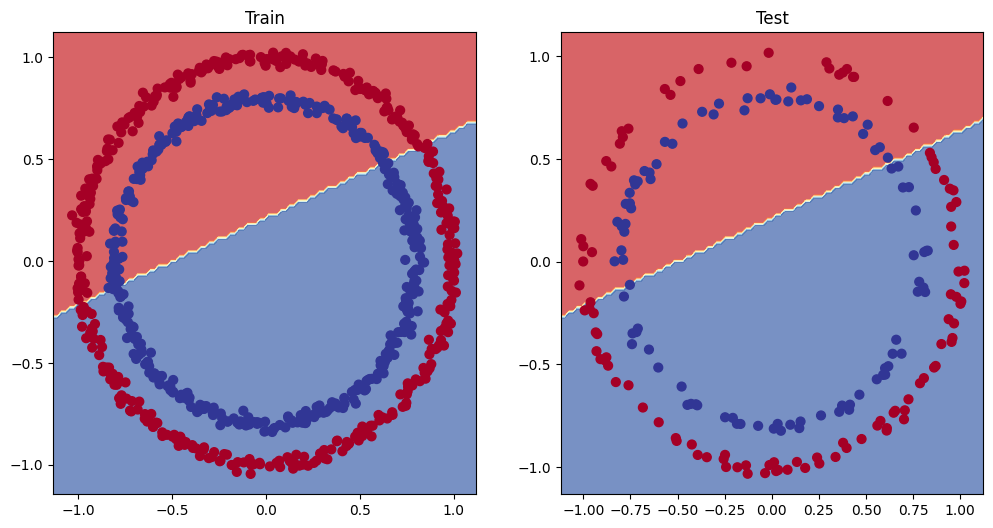

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

Here you can see the model is underfittes as it is trying to divide the points(red, blue) using straight line for beforming the best cut between. Therefore the model is underfitted. As it is not learing in predetive pattern's from the data


## Imporving the model
* Add more layers
* Add more hidden units
* Fit for longer (increase the number's of epoch's)
* Changing the activation
* Changing the loss function
* Changing the learning rate
* Using transfer Lerning


In [16]:
from torch import nn
class CircleModelv2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    # Apply in correct oorder
    return self.layer_3(self.layer_2(self.layer_1(x)))
model_1 = CircleModelv2()
model_1

CircleModelv2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [17]:
y_test.shape , X_test.shape

(torch.Size([200]), torch.Size([200, 2]))

In [18]:
# loss Function And Optimizer
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.1)

In [19]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_test(1000, X_train, X_test, y_train, y_test, model_1, 50)


Epoch : 0 | Train Loss : 0.6966 | Test Loss : 0.6972 | Train Accuracy : 47.12 | Test Accuracy : 46.50 
Epoch : 50 | Train Loss : 0.6922 | Test Loss : 0.7019 | Train Accuracy : 51.88 | Test Accuracy : 46.50 
Epoch : 100 | Train Loss : 0.6920 | Test Loss : 0.7034 | Train Accuracy : 52.75 | Test Accuracy : 43.00 
Epoch : 150 | Train Loss : 0.6920 | Test Loss : 0.7039 | Train Accuracy : 53.25 | Test Accuracy : 41.50 
Epoch : 200 | Train Loss : 0.6920 | Test Loss : 0.7040 | Train Accuracy : 53.12 | Test Accuracy : 41.50 
Epoch : 250 | Train Loss : 0.6920 | Test Loss : 0.7040 | Train Accuracy : 52.88 | Test Accuracy : 40.00 
Epoch : 300 | Train Loss : 0.6920 | Test Loss : 0.7039 | Train Accuracy : 53.00 | Test Accuracy : 40.00 
Epoch : 350 | Train Loss : 0.6920 | Test Loss : 0.7039 | Train Accuracy : 53.12 | Test Accuracy : 40.00 
Epoch : 400 | Train Loss : 0.6920 | Test Loss : 0.7038 | Train Accuracy : 53.25 | Test Accuracy : 40.50 
Epoch : 450 | Train Loss : 0.6920 | Test Loss : 0.7038 | T

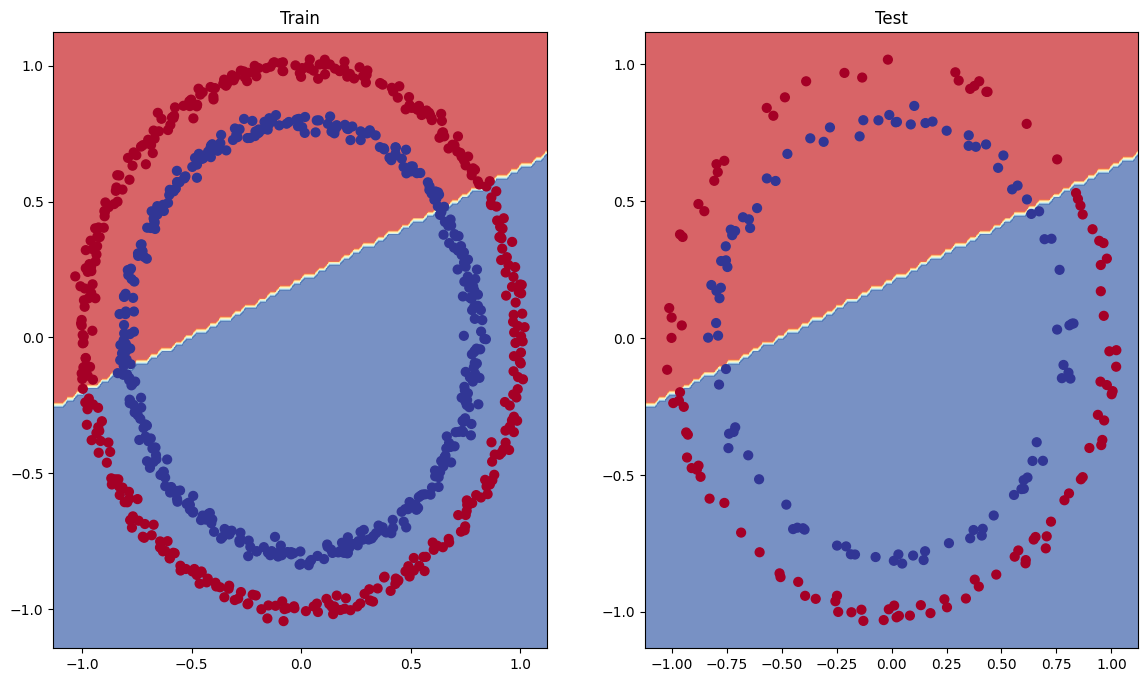

In [20]:
plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [21]:
## Preparing data to check is the model can fit in a straight line
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create a dataset
x_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * x_regression + bias

# Check the data
x_regression[:5], y_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [22]:
# Create Train, Test, Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_regression, y_regression, test_size = 0.2)

len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

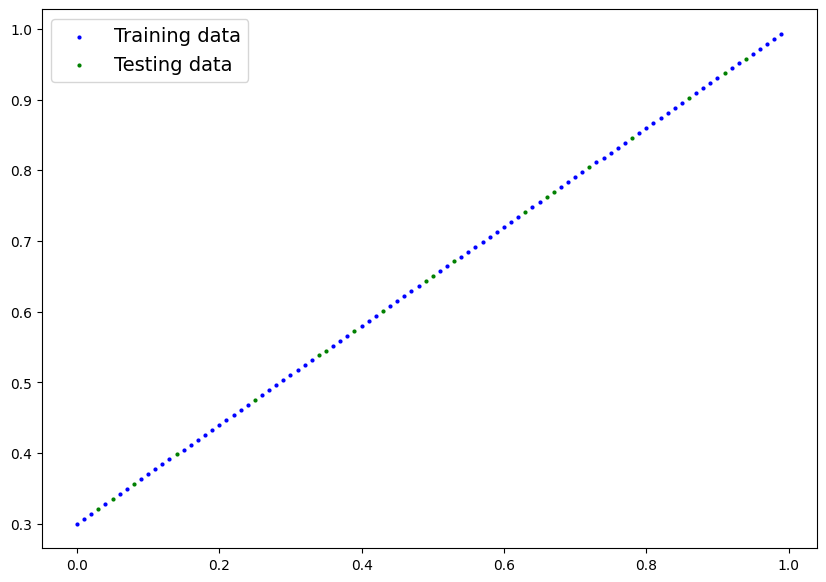

In [23]:
plot_predictions(X_train, y_train, X_test, y_test)

In [24]:
model_1

CircleModelv2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [25]:
# Adjusting `model_1` to fit a straight line

In [26]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1),
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [27]:
# Loss Function and Optimizer

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

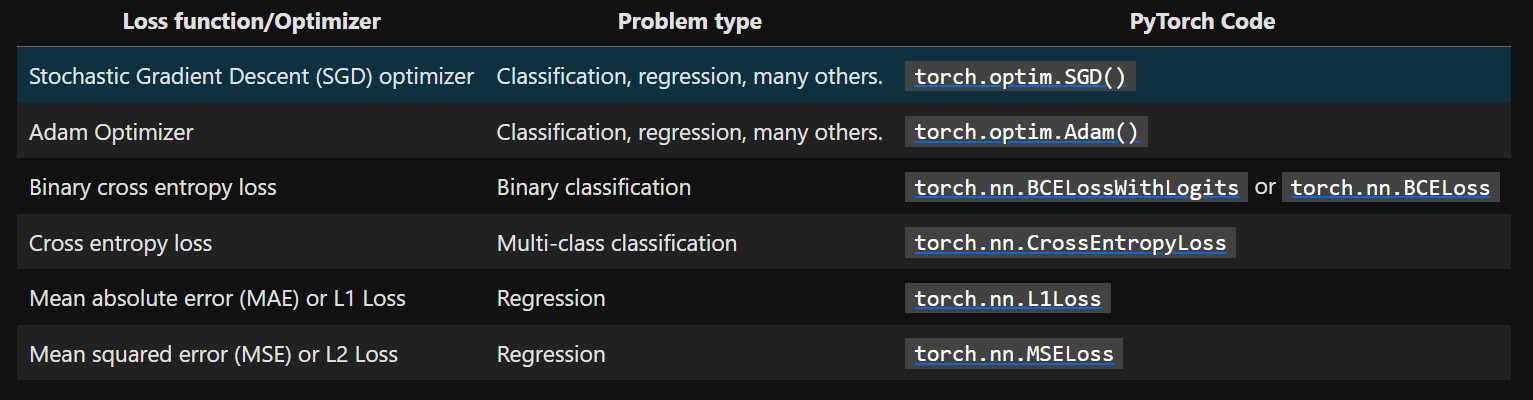


In [28]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 1000

# Set up the device agnostic code

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Train the model_2

for epoch in range(epochs):
  model_2.train()

  y_pred = model_2(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #Testing
  model_2.eval()

  with torch.inference_mode():

    y_preds = model_2(X_test)

    test_loss = loss_fn(y_preds, y_test)

    if epoch % 10 == 0:
      print(f"Epoch : {epoch} | Train Loss : {loss:.4f} | Test Loss : {test_loss:.4f} ")


Epoch : 0 | Train Loss : 0.7994 | Test Loss : 0.4078 
Epoch : 10 | Train Loss : 0.1573 | Test Loss : 0.1329 
Epoch : 20 | Train Loss : 0.1571 | Test Loss : 0.0793 
Epoch : 30 | Train Loss : 0.0916 | Test Loss : 0.0940 
Epoch : 40 | Train Loss : 0.1264 | Test Loss : 0.0712 
Epoch : 50 | Train Loss : 0.1234 | Test Loss : 0.0640 
Epoch : 60 | Train Loss : 0.0696 | Test Loss : 0.0797 
Epoch : 70 | Train Loss : 0.1145 | Test Loss : 0.0578 
Epoch : 80 | Train Loss : 0.0821 | Test Loss : 0.0749 
Epoch : 90 | Train Loss : 0.1010 | Test Loss : 0.0612 
Epoch : 100 | Train Loss : 0.1159 | Test Loss : 0.0452 
Epoch : 110 | Train Loss : 0.0592 | Test Loss : 0.0681 
Epoch : 120 | Train Loss : 0.0880 | Test Loss : 0.0643 
Epoch : 130 | Train Loss : 0.1059 | Test Loss : 0.0458 
Epoch : 140 | Train Loss : 0.0499 | Test Loss : 0.0717 
Epoch : 150 | Train Loss : 0.0896 | Test Loss : 0.0556 
Epoch : 160 | Train Loss : 0.0866 | Test Loss : 0.0567 
Epoch : 170 | Train Loss : 0.0852 | Test Loss : 0.0589 
Epo

In [29]:
y_test.shape,

(torch.Size([20, 1]),)

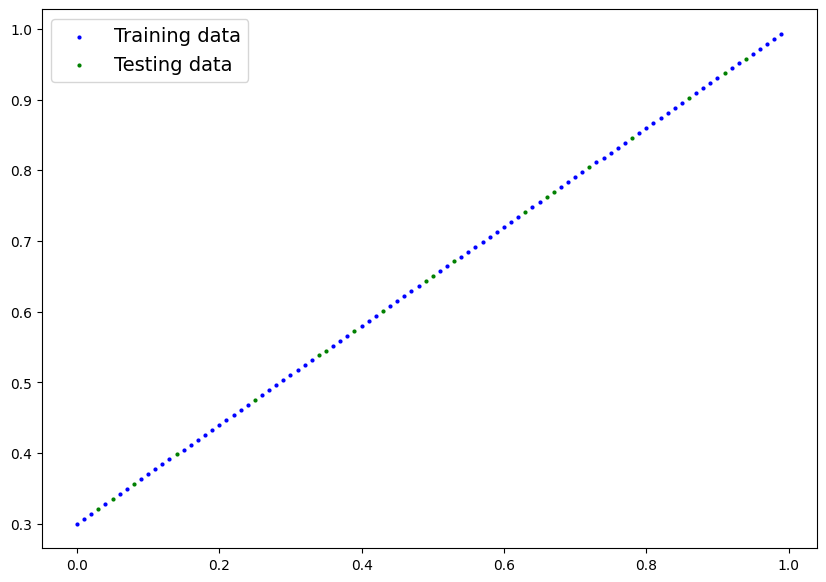

In [30]:

X_train, y_train = X_train.to("cpu"), y_train.to("cpu")
X_test, y_test = X_test.to("cpu"), y_test.to("cpu")

plot_predictions(X_train, y_train, X_test, y_test)

So here we can see that the model can learn

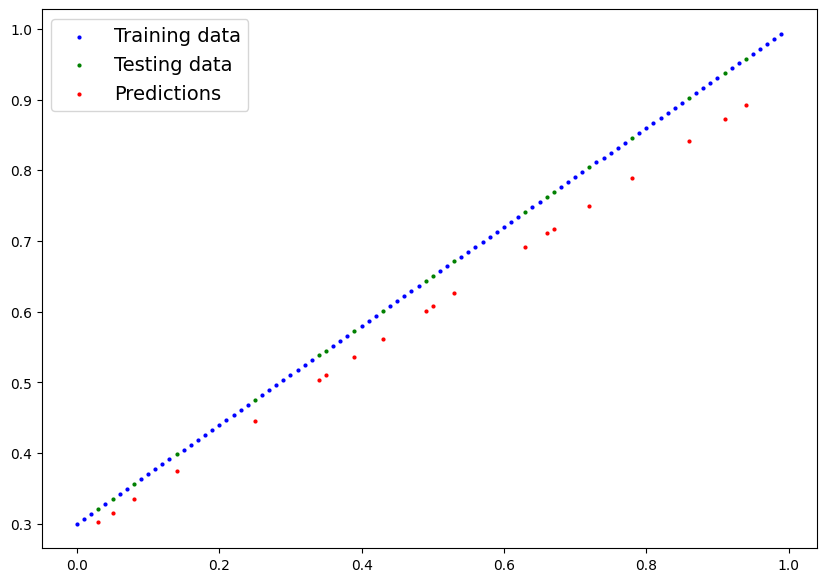

In [31]:
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test)

plot_predictions(X_train, y_train, X_test, y_test, y_preds)

# The missing Pieace : NON-LIINEARLITY

But how about we give it the capacity to draw non-straight (non-linear) lines?

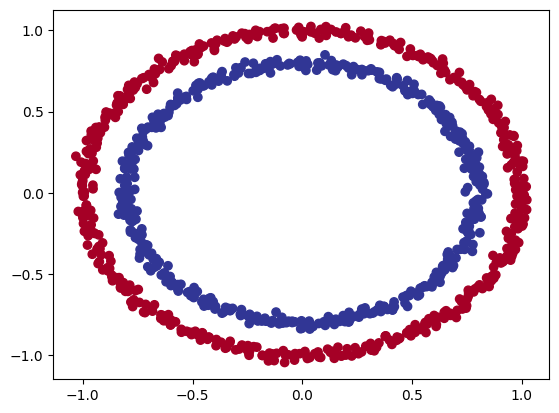

In [32]:
# Recreating non-linear data (Red and Blue circles)

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise = 0.02, random_state = 42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [33]:
# Turn the data into tesor's
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [34]:
# train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [35]:
X_train

tensor([[ 0.9516, -0.2509],
        [-0.6754,  0.4418],
        [-0.1661, -0.7903],
        ...,
        [ 0.5907, -0.5512],
        [-0.5827,  0.8077],
        [ 0.8168, -0.0440]])

# Building a model with non-linearity(not a straight line)
* Linear = Straigh line
* Non-Linear = non-straight lines
* introducing non-linear activation function's (Relu)

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potential able to find patterns in data

In [36]:
from torch import nn
class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10 , out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return  self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV3()
model_3

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [37]:
# loss function and optimizer

loss_fn =  nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params= model_3.parameters(), lr = 0.1)


In [38]:
torch.manual_seed(42)

# Training
train_test(30000, X_train, X_test, y_train, y_test, model_3, n=1000)

Epoch : 0 | Train Loss : 0.6929 | Test Loss : 0.6934 | Train Accuracy : 50.00 | Test Accuracy : 50.00 
Epoch : 1000 | Train Loss : 0.5286 | Test Loss : 0.5313 | Train Accuracy : 89.50 | Test Accuracy : 91.50 
Epoch : 2000 | Train Loss : 0.0296 | Test Loss : 0.0363 | Train Accuracy : 100.00 | Test Accuracy : 100.00 
Epoch : 3000 | Train Loss : 0.0109 | Test Loss : 0.0150 | Train Accuracy : 100.00 | Test Accuracy : 100.00 
Epoch : 4000 | Train Loss : 0.0063 | Test Loss : 0.0094 | Train Accuracy : 100.00 | Test Accuracy : 100.00 
Epoch : 5000 | Train Loss : 0.0044 | Test Loss : 0.0069 | Train Accuracy : 100.00 | Test Accuracy : 100.00 
Epoch : 6000 | Train Loss : 0.0033 | Test Loss : 0.0055 | Train Accuracy : 100.00 | Test Accuracy : 100.00 
Epoch : 7000 | Train Loss : 0.0027 | Test Loss : 0.0045 | Train Accuracy : 100.00 | Test Accuracy : 100.00 
Epoch : 8000 | Train Loss : 0.0022 | Test Loss : 0.0039 | Train Accuracy : 100.00 | Test Accuracy : 100.00 
Epoch : 9000 | Train Loss : 0.0019 

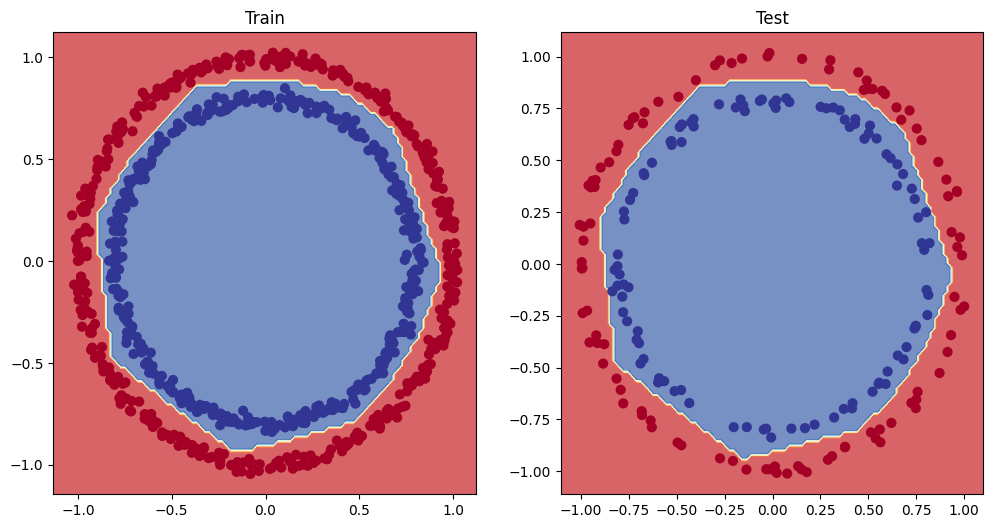

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

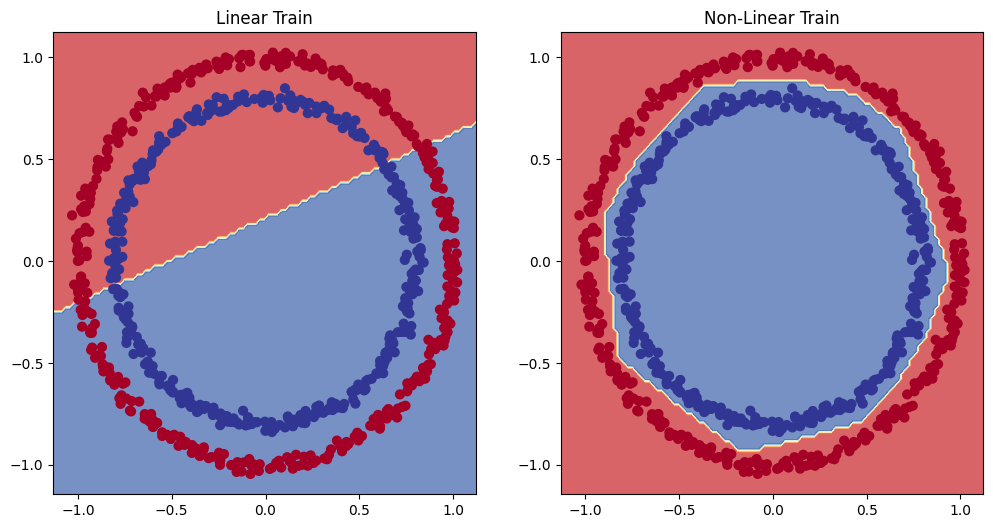

In [40]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Linear Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Non-Linear Train")
plot_decision_boundary(model_3, X_train, y_train)

# Repllication of NoN-Linear Dataset

Neural-networks, rather than us telling the model what to learn, we give it the tools to discover patterns and it tries to figre out the patttern on its own.

# TOOLS:
* Linear Function's
* Non-Linear Function's

### The Missing Pieace

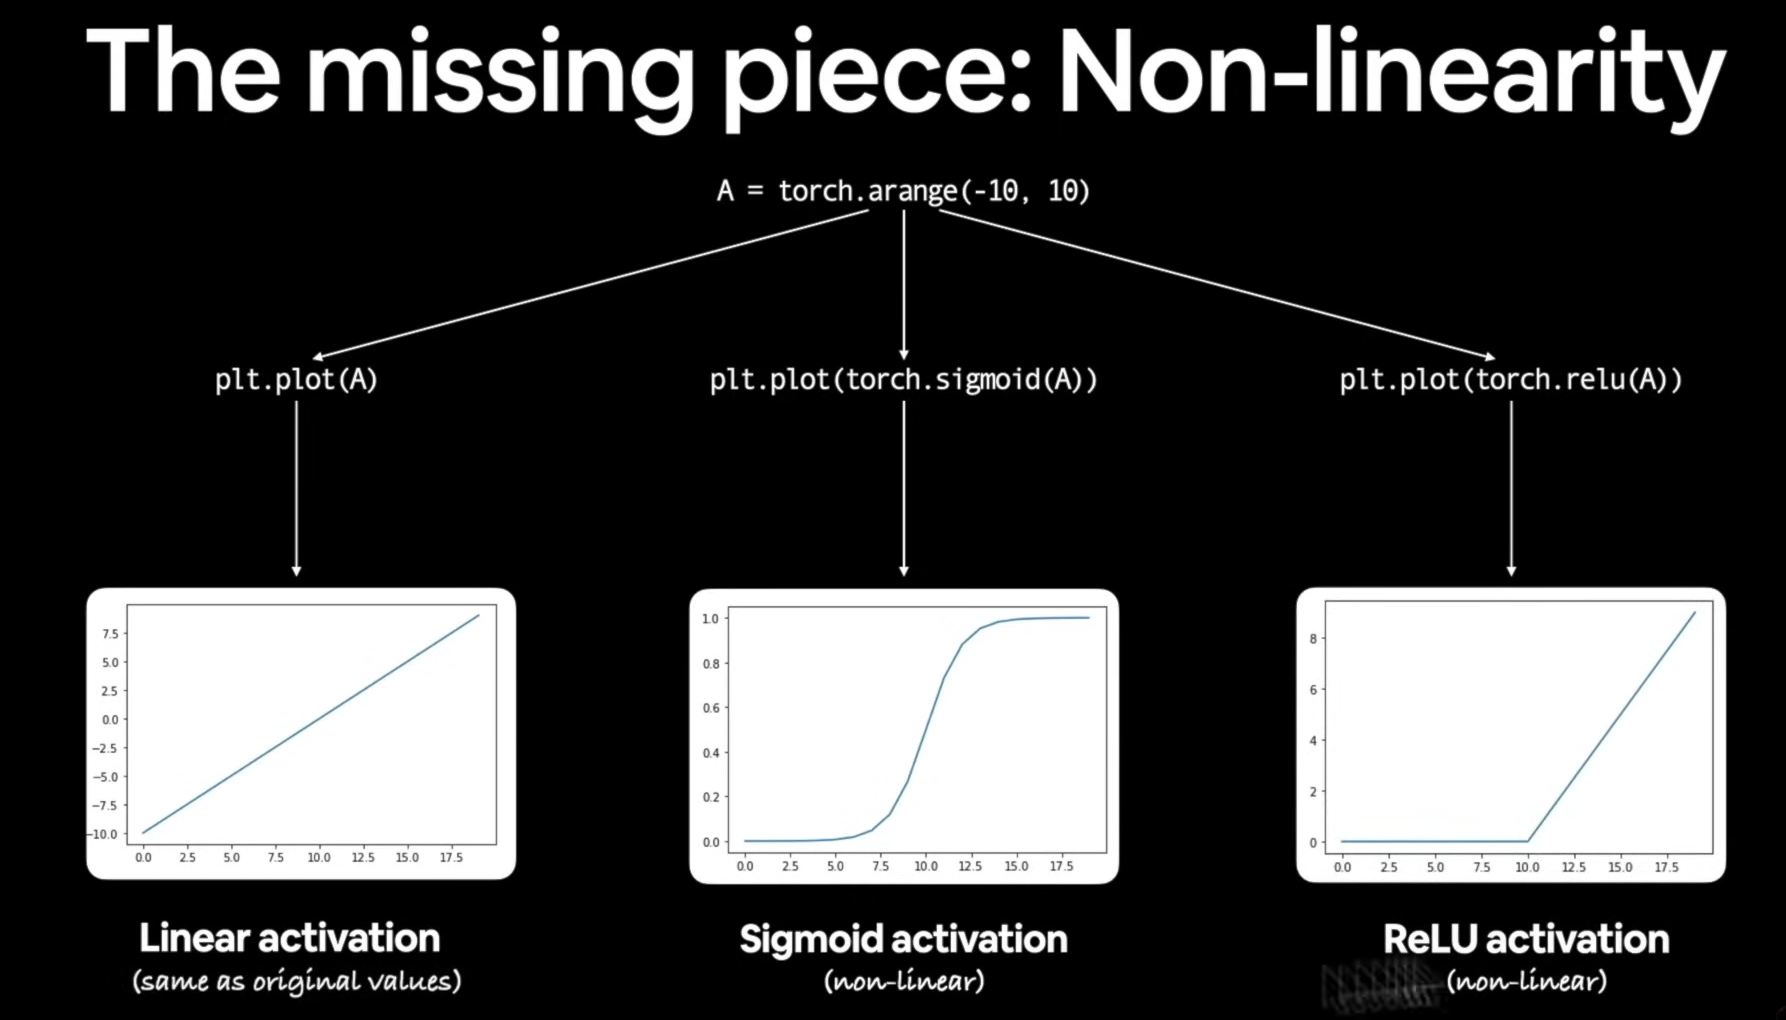

## Putting it all together with multiclass classification problem

* Binary Classification - one thing or another
* Multiclass Classification - More than on thing or another

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


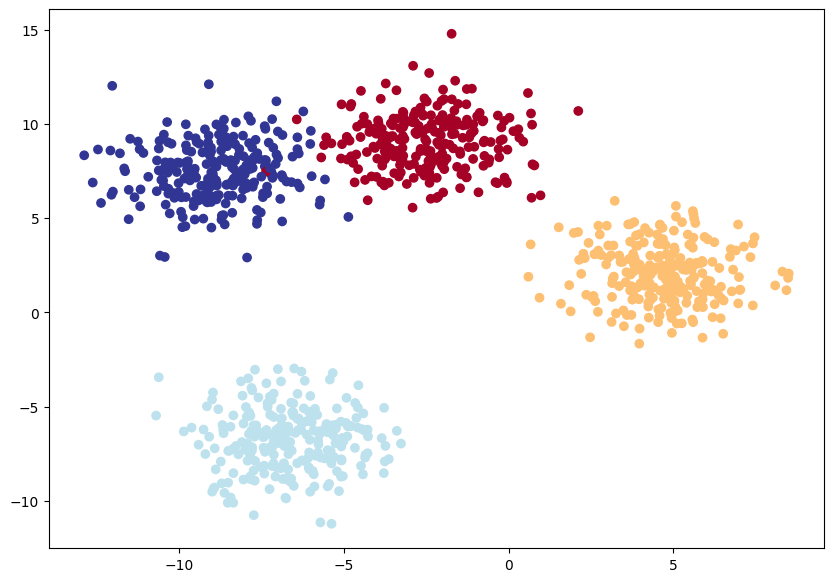

In [62]:
# create toy dataset

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Creat Multiclass Data

X_blob, y_blob = make_blobs(n_samples=1000,
                              n_features = NUM_FEATURES,
                              centers=NUM_CLASSES,
                              cluster_std = 1.5,
                              random_state=RANDOM_SEED
                              )

# Turn the data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.FloatTensor)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
# Features → float, Labels → long
print(X_blob[:5], y_blob[:5])

# split the data into trai and test sets

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                      y_blob,
                                                                      test_size=0.2,
                                                                      random_state=RANDOM_SEED
                                                                      )
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);




In [63]:
X_blob_train.shape, X_blob_test.shape, y_blob_train.shape, y_blob_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

 Q. Does this dataset need non-linearity? Or could you draw a succession of straight lines to separate it?
 Ans: yes, it needs non-linearity as they cannot be segregated using single linear line

In [64]:
len(X_blob_train), len(X_blob_test), len(y_blob_train), len(y_blob_test)

(800, 200, 800, 200)

# Build Multi-Class classification model usiing PyTorch

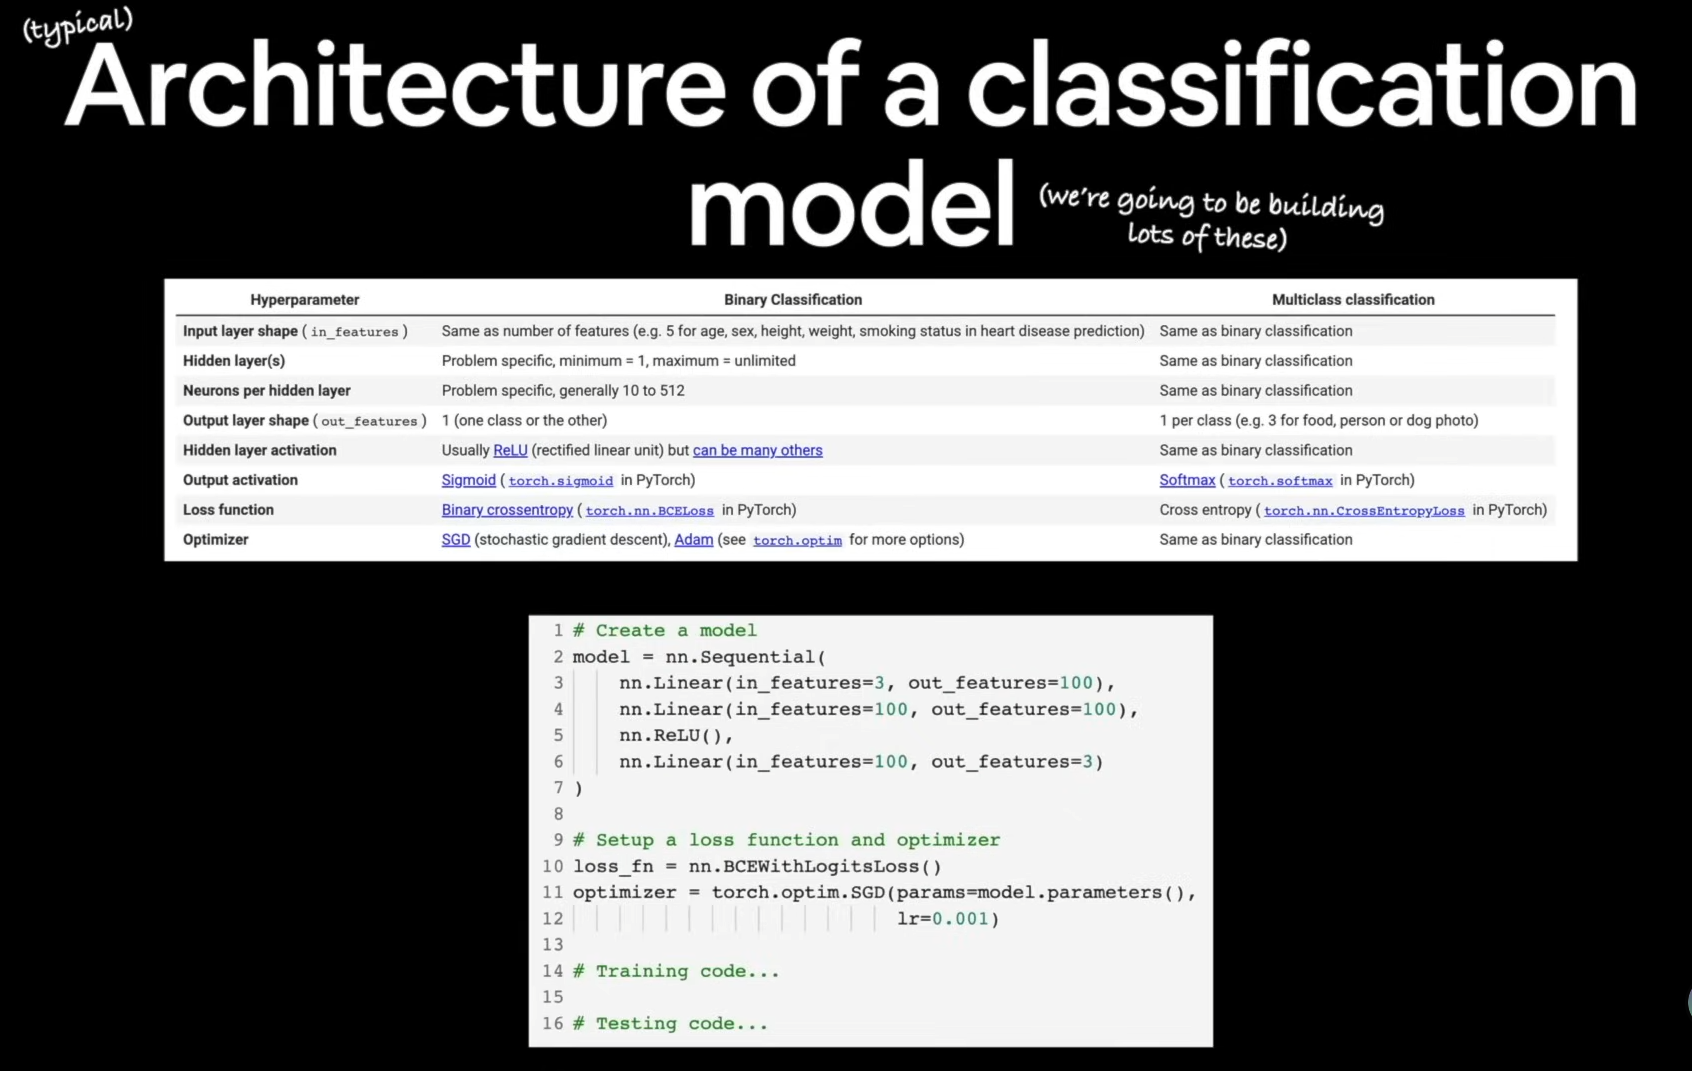

In [65]:
# Create Device Agnostic Code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [66]:
from torch import nn
class BlobModelV1(torch.nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """ Initialize multi-class classification model.
    Args:
      input_features (int): Number of input features to the model.
      output_features (int): Number of output features of the model. (No. of output classes)
      hidden_units (int): Number of hidden units between layers, default 8.

      Return:

      """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
        )
  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModelV1(input_features=2,
                      output_features=4,
                      hidden_units=10).to(device)

In [67]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[-0.9565, -0.5625, -0.0951,  0.7479],
        [-1.6956, -0.3153,  0.3242,  1.1302],
        [-1.4405, -0.1363,  0.2905,  0.9377],
        [-0.2534, -0.3712, -0.0759,  0.5349],
        [-1.0410, -0.6208, -0.0674,  0.7782],
        [-2.1011, -0.3393,  0.4024,  1.3484],
        [-0.9044, -0.0413,  0.2191,  0.7101],
        [-0.8680, -0.5540, -0.0679,  0.6939],
        [-2.2444, -0.2489,  0.4083,  1.2940],
        [-0.9103, -0.5718, -0.0679,  0.7137]])

In [68]:
X_blob_train.shape, y_blob_train.shape


(torch.Size([800, 2]), torch.Size([800]))

In [69]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [70]:
# Create Loss Function, Optimizer and Training loop

loss_fn = nn.CrossEntropyLoss() # used for multiclass claassification
optimizer = torch.optim.SGD(params = model_4.parameters(), lr=0.1)



### Geting Prediction Probabilities for multiclass model

* In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.

`Logit (Raw output's of the model) -> Pred probs (use `torch.softmax`) -> Pred Label (take the armax of the predicted probabilities)`
* For the same we are gonna use activation function whicch in case of binary classification was sigmoid function, but in multi class classification we use softmax() regression,
* Softmax: this is a multinomial logistic reggression model which can genrealize(predict) to support multiple classes dircetly, without the need to train and combine seprate binary classification

`softmax(z_i) = exp(z_i) / sum(exp(z_j) for j in 1..K)`


In [71]:
X_blob_train = X_blob_train.to(device)
X_blob_test = X_blob_test.to(device)
y_blob_train = y_blob_train.to(device)
y_blob_test = y_blob_test.to(device)

In [72]:
y_logits[:10]

tensor([[-0.9565, -0.5625, -0.0951,  0.7479],
        [-1.6956, -0.3153,  0.3242,  1.1302],
        [-1.4405, -0.1363,  0.2905,  0.9377],
        [-0.2534, -0.3712, -0.0759,  0.5349],
        [-1.0410, -0.6208, -0.0674,  0.7782],
        [-2.1011, -0.3393,  0.4024,  1.3484],
        [-0.9044, -0.0413,  0.2191,  0.7101],
        [-0.8680, -0.5540, -0.0679,  0.6939],
        [-2.2444, -0.2489,  0.4083,  1.2940],
        [-0.9103, -0.5718, -0.0679,  0.7137]])

In [73]:
X_blob_train.shape, X_blob_test.shape

(torch.Size([800, 2]), torch.Size([200, 2]))

In [74]:
# Convert out model's Logits into prediction probabilities
y_pred_probs= torch.softmax(y_logits, dim=1)

y_logits[:5], y_pred_probs[:5]

(tensor([[-0.9565, -0.5625, -0.0951,  0.7479],
         [-1.6956, -0.3153,  0.3242,  1.1302],
         [-1.4405, -0.1363,  0.2905,  0.9377],
         [-0.2534, -0.3712, -0.0759,  0.5349],
         [-1.0410, -0.6208, -0.0674,  0.7782]]),
 tensor([[0.0966, 0.1433, 0.2287, 0.5314],
         [0.0340, 0.1353, 0.2565, 0.5742],
         [0.0474, 0.1745, 0.2674, 0.5108],
         [0.1893, 0.1683, 0.2261, 0.4164],
         [0.0882, 0.1343, 0.2335, 0.5440]]))

In [75]:
  torch.sum(y_pred_probs[0])

tensor(1.)

In [76]:
torch.argmax(y_pred_probs[0])

tensor(3)

In [77]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3])

In [78]:
y_logits.argmax(dim=1)

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3])

In [94]:
# Train the model
torch.manual_seed(42)

epochs = 1000

# Put data on target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Training loop
for epoch in range(epochs):
    model_4.train()

    # Forward pass
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)

    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred) # Assuming accuracy_fn is defined elsewhere


    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # Testing
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred) # Assuming accuracy_fn is defined elsewhere

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss:.4f} | Train Acc: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%") # If accuracy_fn is used

Epoch: 0 | Train Loss: 0.0258 | Train Acc: 99.25% | Test Loss: 0.0146 | Test Acc: 99.50%
Epoch: 100 | Train Loss: 0.0247 | Train Acc: 99.38% | Test Loss: 0.0131 | Test Acc: 99.50%
Epoch: 200 | Train Loss: 0.0242 | Train Acc: 99.38% | Test Loss: 0.0123 | Test Acc: 99.50%
Epoch: 300 | Train Loss: 0.0238 | Train Acc: 99.38% | Test Loss: 0.0118 | Test Acc: 99.50%
Epoch: 400 | Train Loss: 0.0235 | Train Acc: 99.38% | Test Loss: 0.0114 | Test Acc: 99.50%
Epoch: 500 | Train Loss: 0.0232 | Train Acc: 99.38% | Test Loss: 0.0111 | Test Acc: 99.50%
Epoch: 600 | Train Loss: 0.0229 | Train Acc: 99.38% | Test Loss: 0.0108 | Test Acc: 99.50%
Epoch: 700 | Train Loss: 0.0227 | Train Acc: 99.38% | Test Loss: 0.0106 | Test Acc: 99.50%
Epoch: 800 | Train Loss: 0.0224 | Train Acc: 99.38% | Test Loss: 0.0104 | Test Acc: 99.50%
Epoch: 900 | Train Loss: 0.0222 | Train Acc: 99.38% | Test Loss: 0.0102 | Test Acc: 99.50%


In [95]:
X_blob_train.shape, model_4

(torch.Size([800, 2]),
 BlobModelV1(
   (linear_layer_stack): Sequential(
     (0): Linear(in_features=2, out_features=10, bias=True)
     (1): ReLU()
     (2): Linear(in_features=10, out_features=10, bias=True)
     (3): ReLU()
     (4): Linear(in_features=10, out_features=4, bias=True)
   )
 ))

In [96]:
y_logits

tensor([[ -6.7942,  14.9460,  -5.4631,  -5.9258],
        [  7.3642,  -7.0151,  -5.3368,  -0.8579],
        [-11.4586,  -3.1046,  14.3107,   0.9277],
        ...,
        [  7.6594,  -6.4556,  -5.1575,  -1.5412],
        [ -8.7519,  -2.5118,  11.2905,   0.5496],
        [ -2.5574, -10.3190,  -0.9392,   7.6880]], grad_fn=<AddmmBackward0>)

In [97]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

y_pred, y_logits[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
         0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
         1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
         2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
         2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
         2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
         1, 3, 2, 0, 3, 1, 2, 1]),
 tensor([[ -5.4885,  13.0810,  -5.9233,  -5.1841],
         [  0.4029, -10.9226,  -4.7438,   8.0311],
         [ -8.4770,  -1.9668,  11.2949,   0.0424],
         [ -4.6669,  10.9688,  -3.6852,  -4.7235],
         [  6.3910,  -4.1957,  -5.1330,  -2.1930],
         [ -0.3556, -13.0658,  -5.2218,  10.1010],
         [ 

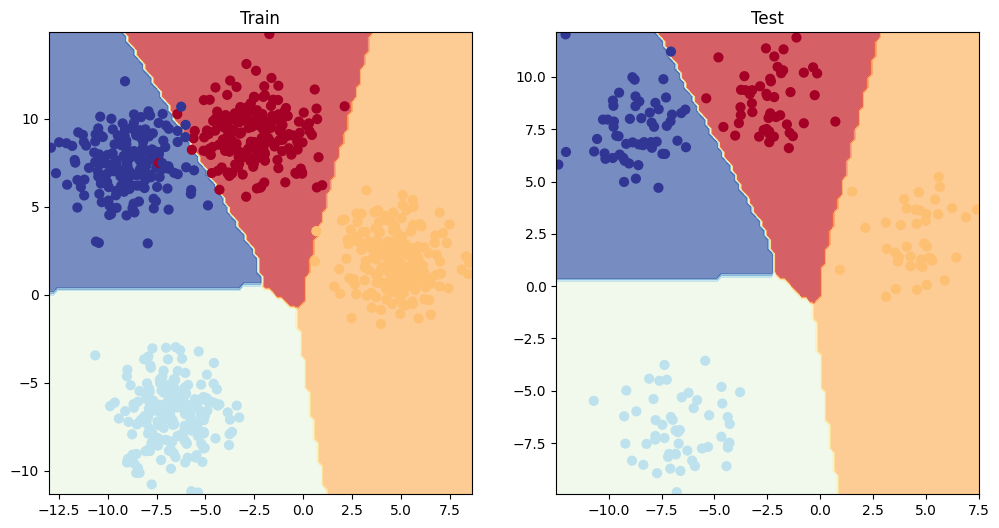

In [101]:
# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)


## A few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right?
* Precission
* Recall
* F1 score
* Confution matrix
* Classification report

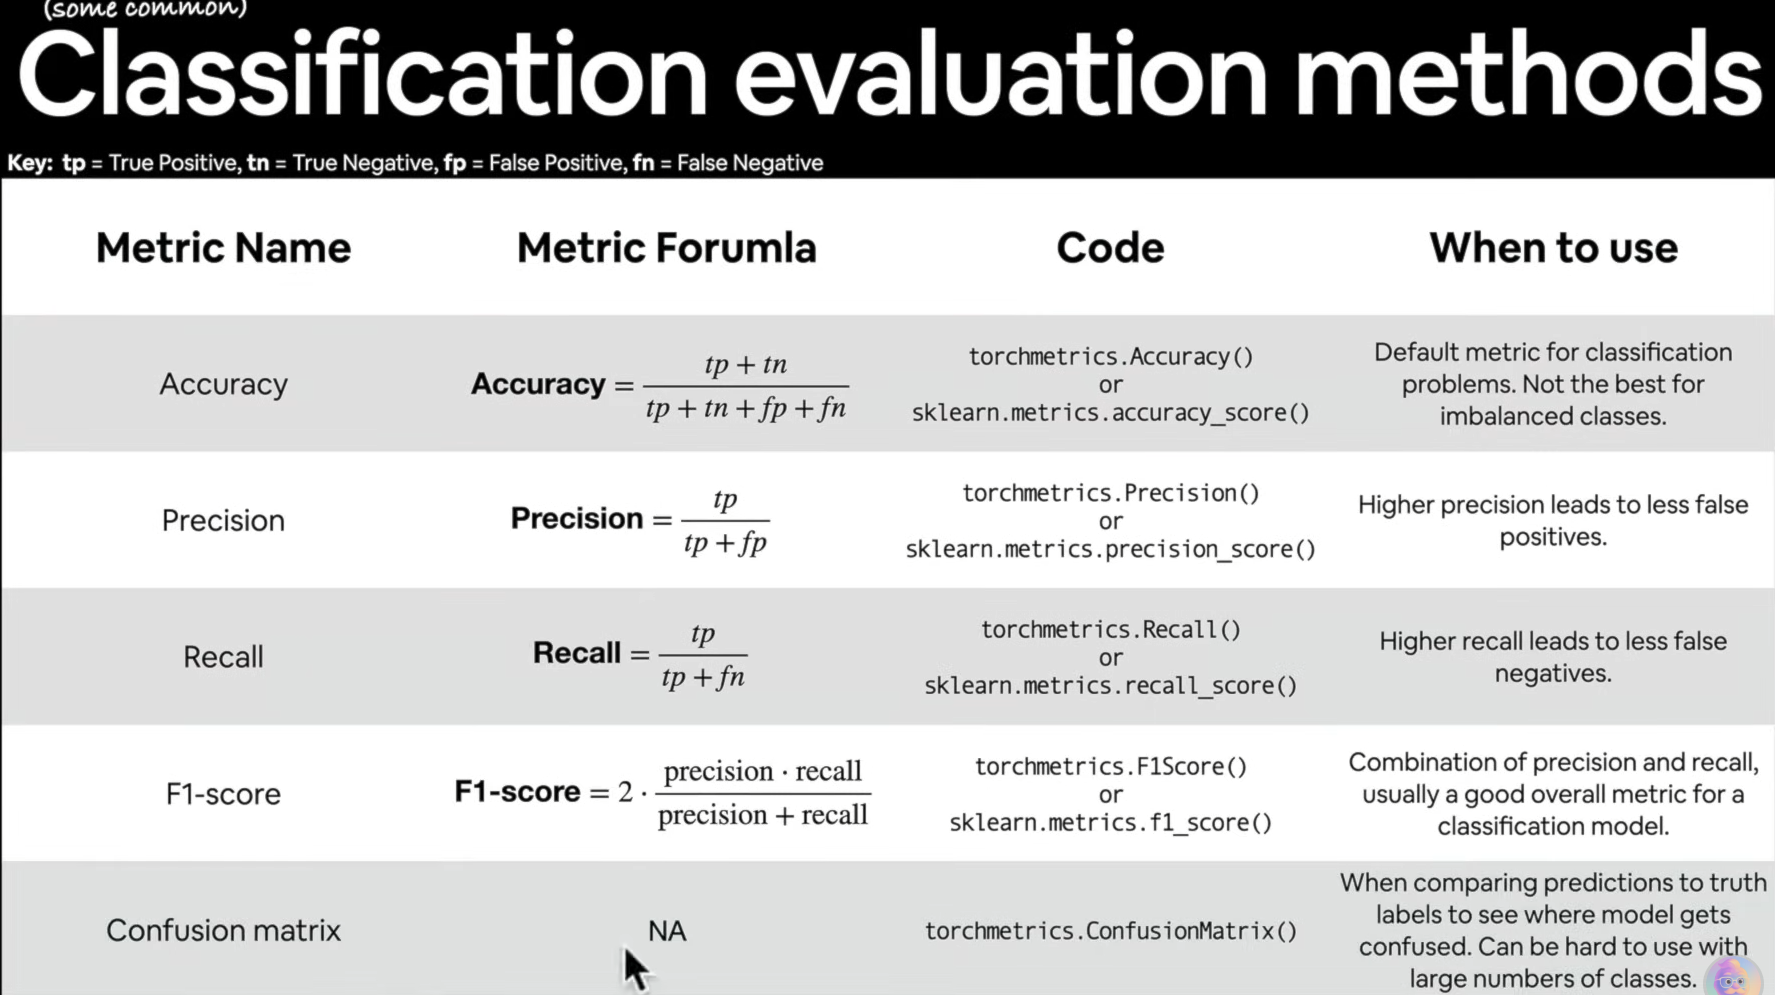